## part 1 preprocessing

In [242]:
import pandas as pd
df=pd.read_csv("titanic-passengers.csv",delimiter=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [243]:
df.shape

(891, 12)

In [244]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [246]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [247]:
print(df.isnull())

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False  False  False  False   False   
889        False     False   False  False  False   True  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [248]:
df.values

array([[343, 'No', 2, ..., 13.0, nan, 'S'],
       [76, 'No', 3, ..., 7.65, 'F G73', 'S'],
       [641, 'No', 3, ..., 7.8542, nan, 'S'],
       ...,
       [535, 'No', 3, ..., 8.6625, nan, 'S'],
       [102, 'No', 3, ..., 7.8958, nan, 'S'],
       [428, 'Yes', 2, ..., 26.0, nan, 'S']], dtype=object)

In [249]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [250]:
df.isnull().sum().sum()

866

In [251]:
df.drop(['Cabin'],axis=1,inplace=True)


In [252]:
df.isnull().sum().sum()

179

In [253]:
df['Age'].fillna(value=df['Age'].mean(),inplace=True)
df.isnull().sum().sum()

2

In [254]:
nmbr=len(df["Embarked"])
print(nmbr)

891


In [255]:
print(df["Embarked"].value_counts())
df["Embarked"].fillna('S',inplace=True)
df.tail()

S    644
C    168
Q     77
Name: Embarked, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.000000,0,0,250655,26.0000,S


In [256]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [257]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Survived']=encoder.fit_transform(df['Survived'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,C
888,535,0,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S


In [258]:
df['Sex']=encoder.fit_transform(df['Sex'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,S


In [259]:
df['Embarked']=encoder.fit_transform(df['Embarked'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,2
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,0
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,0
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,2
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,2


## part 2 visualisation part

In [260]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'histogramme of different age'}, xlabel='Age', ylabel='Frequency'>

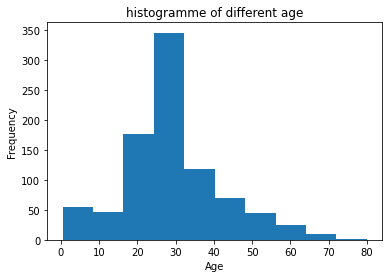

In [261]:
plt.title("histogramme of different age")
plt.xlabel("Age")
df['Age'].plot.hist()

<AxesSubplot:title={'center':'histogramme of Sex'}, xlabel='Sex', ylabel='Frequency'>

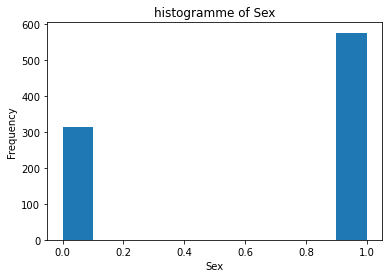

In [262]:
plt.title("histogramme of Sex")
plt.xlabel("Sex")
df['Sex'].plot.hist()

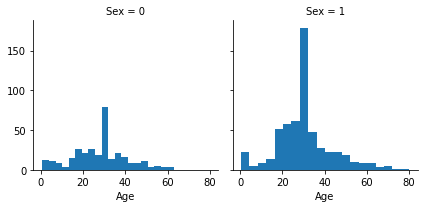

In [263]:
import seaborn as sns
g=sns.FacetGrid(df,col='Sex')
g.map(plt.hist,'Age',bins=20)

In [264]:
df[['Survived','Age','Sex']].groupby(['Survived'],as_index=True).mean()

,Age,Sex
Survived,,
0,30.415100,0.852459
1,28.549778,0.318713


In [265]:
df[['Survived','Sex']].groupby(['Survived'],as_index=True).mean()

,Sex
Survived,
0,0.852459
1,0.318713


In [266]:
df[['Survived','Age']].groupby(['Survived'],as_index=True).mean()

,Age
Survived,
0,30.415100
1,28.549778


In [267]:
df[['Survived','Pclass','SibSp']].groupby(['Survived'],as_index=True).mean()

,Pclass,SibSp
Survived,,
0,2.531876,0.553734
1,1.950292,0.473684


In [268]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

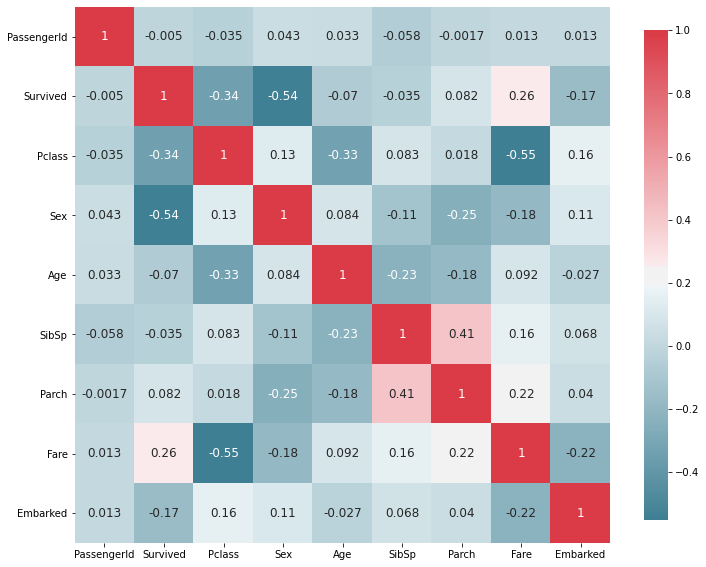

In [269]:
plot_correlation_map(df)

In [270]:
df[['Survived','Pclass']].groupby(['Survived'],as_index=True).mean()

,Pclass
Survived,
0,2.531876
1,1.950292


In [271]:
#df.drop(['Name'],axis=1,inplace=True)
#df.head()

SyntaxError: invalid syntax (<ipython-input-305-43a691bb12dd>, line 3)